In [16]:
import math
import os
import matplotlib.pyplot as plt
import numpy as np

In [38]:
file_path = '/home/mans/pyscripts/cross_sections'

atom_path = f'{file_path}/C_cross.txt'
with open(atom_path, "r") as f:
    C_cross = np.loadtxt(atom_path)

atom_path = f'{file_path}/H_cross.txt'
with open(atom_path, "r") as f:
    H_cross = np.loadtxt(atom_path)

atom_path = f'{file_path}/N_cross.txt'
with open(atom_path, "r") as f:
    N_cross = np.loadtxt(atom_path)

atom_path = f'{file_path}/O_cross.txt'
with open(atom_path, "r") as f:
    O_cross = np.loadtxt(atom_path)

atom_path = f'{file_path}/S_cross.txt'
with open(atom_path, "r") as f:
    S_cross = np.loadtxt(atom_path)

In [47]:
# Choose a common energy grid (e.g., the union of all unique energies, sorted)
all_energies = np.unique(
    np.concatenate([
        C_cross[:, 0],
        H_cross[:, 0],
        N_cross[:, 0],
        O_cross[:, 0],
        S_cross[:, 0]
    ])
)
# Or, for a regular grid:
# all_energies = np.linspace(min_energy, max_energy, num_points)

# Interpolate each cross section onto the common grid
C_interp = np.interp(all_energies, C_cross[:, 0], C_cross[:, 1])
H_interp = np.interp(all_energies, H_cross[:, 0], H_cross[:, 1])
N_interp = np.interp(all_energies, N_cross[:, 0], N_cross[:, 1])
O_interp = np.interp(all_energies, O_cross[:, 0], O_cross[:, 1])
S_interp = np.interp(all_energies, S_cross[:, 0], S_cross[:, 1])


In [49]:

cross_sections = np.stack([
    C_interp[:],
    H_interp[:],
    N_interp[:],
    O_interp[:],
    S_interp[:]
], axis=1)
average_cross_section = np.mean(cross_sections, axis=1)

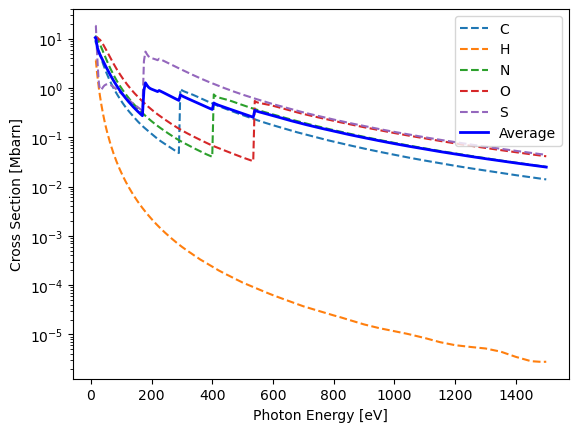

In [53]:
plt.plot(all_energies, C_interp, label='C', linestyle='--')
plt.plot(all_energies, H_interp, label='H', linestyle='--')
plt.plot(all_energies, N_interp, label='N', linestyle='--')
plt.plot(all_energies, O_interp, label='O', linestyle='--')
plt.plot(all_energies, S_interp, label='S', linestyle='--')

# Plot the average cross section as a bold black line
plt.plot(all_energies, average_cross_section, label='Average', color='blue', linewidth=2)

plt.yscale('log')
plt.legend()

plt.xlabel('Photon Energy [eV]')
plt.ylabel('Cross Section [Mbarn]')
plt.show()